<a href="https://colab.research.google.com/github/Muhammed-Shaahidh/Heart_Attack_Prediction/blob/master/Group_34_PipeLine/Heart_Attack_Prediction_G_34.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install missingno matplotlib seaborn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

In [4]:
url = "https://raw.githubusercontent.com/Muhammed-Shaahidh/Heart_Attack_Prediction/refs/heads/master/Data/data.csv"
df_base = pd.read_csv(url)
df_base.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


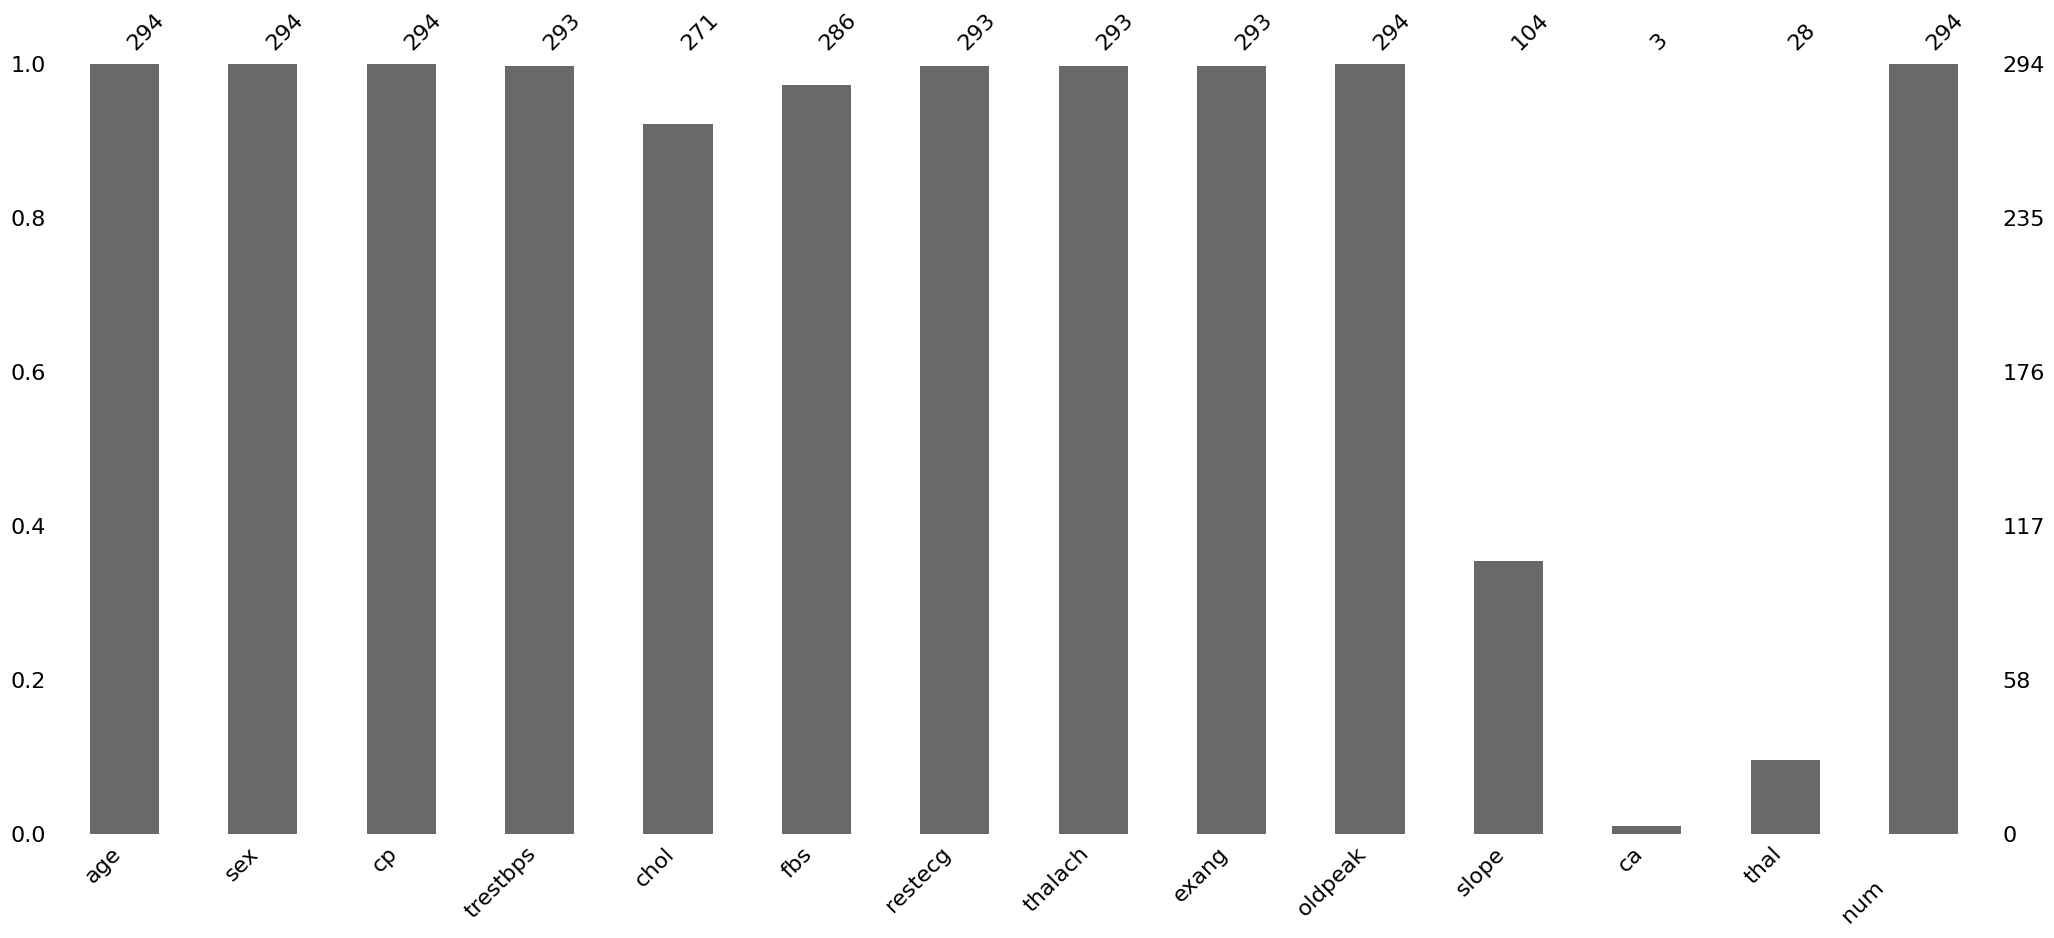

In [ ]:
#Member1 #IT24102908 #Data cleaning(Imputation, Removing Duplicates)


f1 = df_base.replace('?', np.nan)

# Visualize missing values
msno.bar(f1)
plt.show()

# Example imputation
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

for col in f1.columns:
    if f1[col].dtype == 'O':  # categorical
        f1[col] = cat_imputer.fit_transform(f1[[col]]).flatten()
    else:  # numerical
        f1[col] = num_imputer.fit_transform(f1[[col]]).flatten()

# Remove duplicates
f1 = f1.drop_duplicates()

# Save cleaned data
f1.to_csv('data.csv', index=False)

In [ ]:
print(f1.duplicated().sum())

0


In [ ]:
print(f1.isna().sum())

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
num           0
dtype: int64


Member 02- IT24102659 (Senevirathna K.S.D.B.)- Handling Outliers

age: 0 outliers


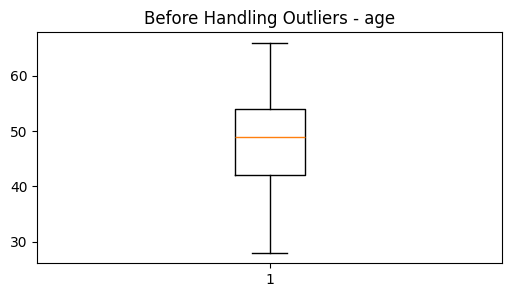

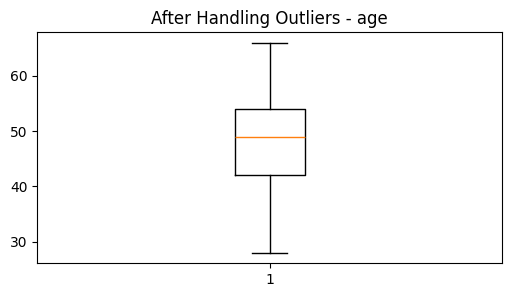

sex: 0 outliers


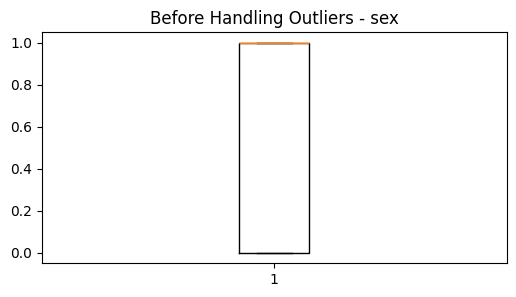

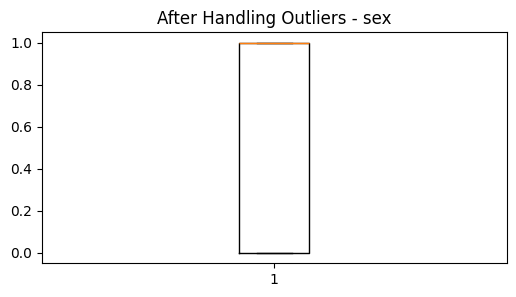

cp: 0 outliers


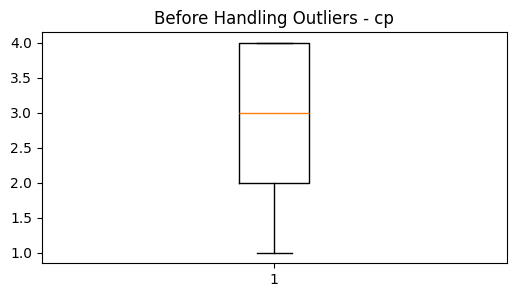

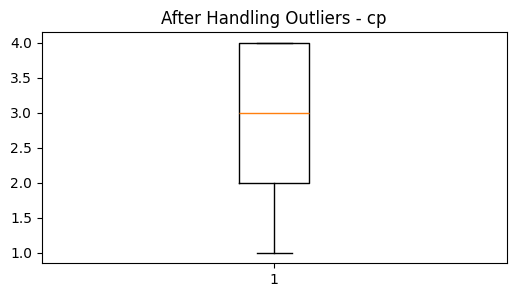

oldpeak: 11 outliers


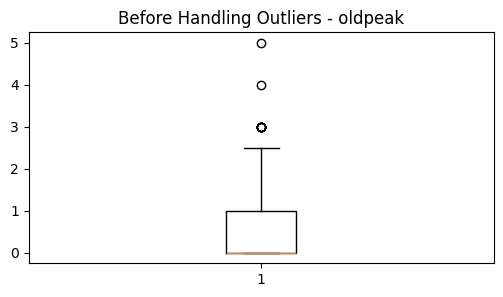

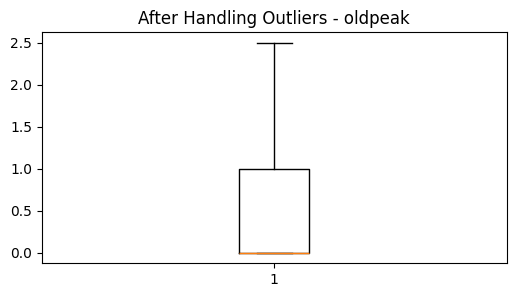

num       : 0 outliers


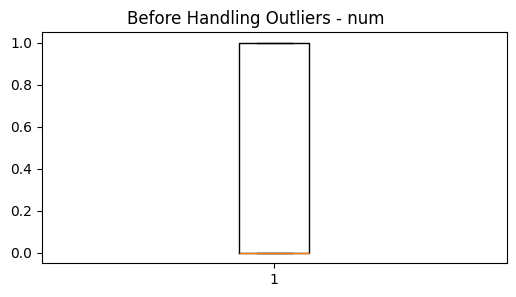

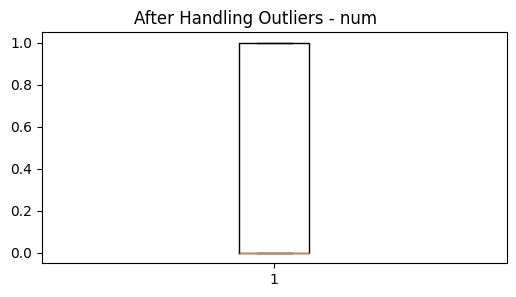

✅ Outlier handling complete. Cleaned file saved as 'data_outliers_handled.csv'


In [ ]:
#Member 2 (IT24102659 Senevirathna K.S.D.B)– Handling Outliers


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load cleaned dataset
f1 = pd.read_csv('data.csv')

# Detect outliers using IQR method
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] < lower) | (df[col] > upper)]

# Handle outliers by capping (winsorization)
def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])
    return df

# Loop through numeric columns
for col in f1.select_dtypes(include=[np.number]).columns:
    outliers = detect_outliers_iqr(f1, col)
    print(f"{col}: {len(outliers)} outliers")

    # Boxplot before handling
    plt.figure(figsize=(6,3))
    plt.title(f"Before Handling Outliers - {col}")
    plt.boxplot(f1[col])
    plt.show()

    # Handle outliers
    f1 = cap_outliers(f1, col)

    # Boxplot after handling
    plt.figure(figsize=(6,3))
    plt.title(f"After Handling Outliers - {col}")
    plt.boxplot(f1[col])
    plt.show()

# Save dataset after outlier handling
f1.to_csv('data_outliers_handled.csv', index=False)

print("✅ Outlier handling complete. Cleaned file saved as 'data_outliers_handled.csv'")


Member 05 - IT24610823 (Shaahidh M.W.M) - Normalizaton/Scaling

In [ ]:
df = pd.read_csv('data.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28.0,1.0,2.0,130,132,0,2,185,0,0.0,2,0,7,0.0
1,29.0,1.0,2.0,120,243,0,0,160,0,0.0,2,0,7,0.0
2,29.0,1.0,2.0,140,230,0,0,170,0,0.0,2,0,7,0.0
3,30.0,0.0,1.0,170,237,0,1,170,0,0.0,2,0,6,0.0
4,31.0,0.0,2.0,100,219,0,1,150,0,0.0,2,0,7,0.0


In [ ]:
#Drop target column
df = df.rename(columns = {"num       " : "target"})
X = df.drop("target", axis = 1)
Y = df["target"]

In [ ]:
X = X.replace('?', np.nan)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,28.0,1.0,2.0,130,132,0,2,185,0,0.0,2,0,7
1,29.0,1.0,2.0,120,243,0,0,160,0,0.0,2,0,7
2,29.0,1.0,2.0,140,230,0,0,170,0,0.0,2,0,7
3,30.0,0.0,1.0,170,237,0,1,170,0,0.0,2,0,6
4,31.0,0.0,2.0,100,219,0,1,150,0,0.0,2,0,7


In [ ]:
#Normalization (Min-Max Scaling: values between 0 and 1)
min_max_scaler = MinMaxScaler()
X_min_max = min_max_scaler.fit_transform(X)

#Convert back to Data Frame
X_min_max = pd.DataFrame(X_min_max, columns=X.columns)
print("First 5 rows after Normalization (0-1 Scale): ")
X_min_max.head()

First 5 rows after Normalization (0-1 Scale): 


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.000000,1.0,0.333333,0.351852,0.090734,0.0,1.0,0.953704,0.0,0.0,0.5,0.0,1.00
1,0.026316,1.0,0.333333,0.259259,0.305019,0.0,0.0,0.722222,0.0,0.0,0.5,0.0,1.00
2,0.026316,1.0,0.333333,0.444444,0.279923,0.0,0.0,0.814815,0.0,0.0,0.5,0.0,1.00
3,0.052632,0.0,0.000000,0.722222,0.293436,0.0,0.5,0.814815,0.0,0.0,0.5,0.0,0.75
4,0.078947,0.0,0.333333,0.074074,0.258687,0.0,0.5,0.629630,0.0,0.0,0.5,0.0,1.00


In [ ]:
#Standardization (Z-score scaling)
standard_scaler = StandardScaler()
X_standard = standard_scaler.fit_transform(X)

#Convert back to Data Frame
X_standard = pd.DataFrame(X_standard, columns=X.columns)
print("First 5 rows after Standardization (mean = 0, std = 1): ")
X_standard.head()

First 5 rows after Standardization (mean = 0, std = 1): 


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-2.537605,0.612851,-1.023819,-0.149055,-1.799378,-0.270666,3.872301,1.951186,-0.660511,-0.647637,0.181133,0.0,0.205175
1,-2.409588,0.612851,-1.023819,-0.718457,-0.096399,-0.270666,-0.474765,0.888551,-0.660511,-0.647637,0.181133,0.0,0.205175
2,-2.409588,0.612851,-1.023819,0.420347,-0.295847,-0.270666,-0.474765,1.313605,-0.660511,-0.647637,0.181133,0.0,0.205175
3,-2.281572,-1.631717,-2.061808,2.128552,-0.188452,-0.270666,1.698768,1.313605,-0.660511,-0.647637,0.181133,0.0,-1.376830
4,-2.153556,-1.631717,-1.023819,-1.857260,-0.464611,-0.270666,1.698768,0.463497,-0.660511,-0.647637,0.181133,0.0,0.205175


Member 03- IT24103607 (K.A.A.Lakshani) - Feature_Engineering

In [ ]:
# Convert 'chol' column to numeric, coercing errors to NaN
df_base['chol'] = pd.to_numeric(df_base['chol'], errors='coerce')

Create age groups

In [ ]:
# Create age groups
df_base['age_group'] = pd.cut(df_base['age'],
                              bins=[0,30,40,50,60,70,100],
                              labels=['<30','30-39','40-49','50-59','60-69','70+'])


In [ ]:
# Create high cholesterol flag
df_base['high_chol'] = (df_base['chol'] > 240).astype(int)


Drop the irrelevant colums

In [ ]:
# Example: drop irrelevant columns (if any exist)
# df_base.drop(columns=['some_column'], inplace=True)


In [ ]:
df_base.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,high_chol,age_group
0,28,1,2,130,132.0,0,2,185,0,0.0,?,?,?,0,0,<30
1,29,1,2,120,243.0,0,0,160,0,0.0,?,?,?,0,1,<30
2,29,1,2,140,NaN,0,0,170,0,0.0,?,?,?,0,0,<30
3,30,0,1,170,237.0,0,1,170,0,0.0,?,?,6,0,0,<30
4,31,0,2,100,219.0,0,1,150,0,0.0,?,?,?,0,0,30-39


Member 04- IT24104096 (Kaluarachchi S.S.)- Encoding Categorical Variables

In [1]:
import sklearn
from packaging import version
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np

In [5]:
# Including columns that exist in the dataset
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

# Handling NaN values and ensuring they are strings
for c in categorical_cols:
    df_base[c] = df_base[c].fillna('missing').astype(str)

print("scikit-learn version:", sklearn.__version__)

# Choosing correct param name
if version.parse(sklearn.__version__) >= version.parse("1.2"):
    encoder = OneHotEncoder(drop='first', sparse_output=False)
else:
    encoder = OneHotEncoder(drop='first', sparse=False)

# Fit-transform
encoded = encoder.fit_transform(df_base[categorical_cols])

# Making DataFrame from encoded array
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Dropping original categorical columns and join encoded
df_encoded = df_base.drop(columns=categorical_cols).reset_index(drop=True)
df_encoded = pd.concat([df_encoded, encoded_df], axis=1)

print("Shape before encoding:", df_base.shape)
print("Shape after encoding:", df_encoded.shape)
df_encoded.head()


scikit-learn version: 1.6.1
Shape before encoding: (294, 14)
Shape after encoding: (294, 24)


,age,trestbps,chol,thalach,oldpeak,ca,num,sex_1,cp_2,cp_3,...,restecg_2,restecg_?,exang_1,exang_?,slope_2,slope_3,slope_?,thal_6,thal_7,thal_?
0,28,130,132,185,0.0,?,0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,29,120,243,160,0.0,?,0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,29,140,?,170,0.0,?,0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,30,170,237,170,0.0,?,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,31,100,219,150,0.0,?,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
